In [1]:
import matplotlib.pyplot as plt
from numpy import *
from numpy import inf
import networkx as nx
from networkx.algorithms.shortest_paths import weighted
from networkx.algorithms.shortest_paths.dense import floyd_warshall

G = nx.Graph()
G2 = nx.Graph()

### Exit Function

In [2]:
def EXIT():
    print('\n\n\n')
    print('GROUP MEMBERS')
    print('ABDUL GHAFFAR ANSARI')
    print('MARYAM HUSSAIN')
    exit()

### Prim's Algorithm

In [3]:
def p_algo(no_of_nodes,Adjacency_Mat,f,line):
    print("\n\nWelcome to Prim's Algorithm\n")
    selected = [0]*no_of_nodes
    e = 0
    mst = 0
    selected[int(line)] = True
    while(e < no_of_nodes-1):
        min = inf
        x = 0
        y = 0
        for i  in range(no_of_nodes):
               if(selected[i]):
                    for j in range(no_of_nodes):
                         if((not selected[j]) and Adjacency_Mat[i,j]):
                              if(min > Adjacency_Mat[i,j]):
                                   x = i
                                   y = j
        G2.add_edge(str(x),str(y))
        mst+=Adjacency_Mat[x][y]
        print("Edge ("+ str(x) + "  -->  " + str(y) + ")  " + "Weight : "+str(Adjacency_Mat[x][y]))
        selected[y] = True
        e+=1
    print("MST = ",mst)

### Kruskul Algorithm

In [4]:
def find(i,parent):
    while parent[i] != i:
        i = parent[i]
    return i
def union(i, j,parent):
    a = find(i,parent)
    b = find(j,parent)
    parent[a] = b

def krus(Adjacency_Mat ,no_of_nodes,parent):
    print("\n\nWelcome to Kruskul Algorithm\n")
    mst = 0
    for i in range(no_of_nodes):
        parent[i] = i
    e = 0
    while e < no_of_nodes - 1:
        min = inf
        a = -1
        b = -1
        for i in range(no_of_nodes):
            for j in range(no_of_nodes):
                if find(i,parent) != find(j,parent) and Adjacency_Mat [i][j] < min:
                    min = Adjacency_Mat [i][j]
                    a = i
                    b = j
        union(a, b,parent)
        print('Edge {}:({} -> {}) Weight:{}'.format(e, a, b, min))
        e += 1
        mst += min
        G2.add_edge(str(a),str(b))
    print("Minimum cost= {}".format(mst))

### Bellman Ford

In [5]:
def bellman(Adjacency_Mat ,no_of_nodes,f,line):
    print("\n\nWelcome to Bellman Ford Algorithm\n")
    Dist =[inf] * no_of_nodes
    parent = [-1]*no_of_nodes
    Dist[int(line)] = 0
    for i in range(no_of_nodes-1):
          for e in G.edges():
               if(Dist[int(e[0])] + Adjacency_Mat [int(e[0]),int(e[1])] < Dist[int(e[1])]):
                    Dist[int(e[1])] = Dist[int(e[0])] + Adjacency_Mat [int(e[0]),int(e[1])]
                    parent[int(e[1])] = int(e[0])
               if(Dist[int(e[1])] + Adjacency_Mat [int(e[0]),int(e[1])] < Dist[int(e[0])]):
                    Dist[int(e[0])] = Dist[int(e[1])] + Adjacency_Mat [int(e[0]),int(e[1])]
                    parent[int(e[0])] = int(e[1])
    for e in G.edges():
          if(Dist[int(e[0])] != inf and (Dist[int(e[0])] + Adjacency_Mat [int(e[0]),int(e[1])] < Dist[int(e[1])])):
               print ("Negative cyles")
               exit(0)
    print("Nodes       :    Weigths    :     Paths")
    for i in range(no_of_nodes):
          print(int(line), "  -  ",i,"  :  " ,Dist[i], end = "         ")
          j = i
          Arr = []
          while(parent[j] != -1):
               G2.add_edge(str(parent[j]),str(j),)
               Arr.append(j)
               j = parent[j]
          Arr.reverse()
          for j in Arr:
               print(j, end = " ")
          print()

### Dijkstra Algorithm

In [6]:
def dijkstra_algo(Adjacency_Mat ,no_of_nodes,f,line):
    print("\n\nWelcome to Dijkstra Algorithm\n")
    dist = [inf] * no_of_nodes
    parent = [-1] * no_of_nodes
    dist[int(line)] = 0
    Arr = []
    for i in range (no_of_nodes):
          Arr.append(i)
    while (Arr):
          minimum = inf
          min_index = -1
          for i in range (no_of_nodes):
               if (dist[i] < minimum and i in Arr):
                    minimum = dist[i]
                    min_index = i
          Arr.remove(min_index)
          for i in range (no_of_nodes):
               if (Adjacency_Mat [min_index][i] and i in Arr):
                    if (dist[min_index] + Adjacency_Mat [min_index,i] < dist[i]):
                         dist[i] = dist[min_index] + Adjacency_Mat [min_index,i]
                         parent[i] = min_index
    print("Nodes       :    Weigths    :     Paths")
    for i in range(no_of_nodes):
          print(int(line), "  -  ",i,"  :  " ,dist[i], end = "         ")
          j = i
          Arr1 = []
          while(parent[j] != -1):
               G2.add_edge(str(parent[j]),str(j))
               Arr1.append(j)
               j = parent[j]
          Arr1.reverse()
          for j in Arr1:
               print(j, end = " ")
          print()

### Floyd Warshall Algorithm

In [7]:
def floyd(Adjacency_Mat ,no_of_nodes):
    print("\n\nWelcome to Floyd Warshall Algorithm\n")
    parent = [-1]*no_of_nodes
    for i in range (no_of_nodes):
          for j in range(no_of_nodes):
               print(Adjacency_Mat [i,j], end = "  ")
          print()
    for i in range(no_of_nodes):
          for j in range (no_of_nodes):
               for k in range(no_of_nodes):
                    if (Adjacency_Mat [j,k] > Adjacency_Mat [j,i] + Adjacency_Mat [i,k]):
                         Adjacency_Mat [j,k] = Adjacency_Mat [j,i] + Adjacency_Mat [i,k]
                         parent[k] = i
                         parent[i] = j
    for i in range (no_of_nodes):
          G2.add_edge(str(i),str(parent[i]))
    for i in range (no_of_nodes):
          for j in range (no_of_nodes):
               print(Adjacency_Mat [i,j], end = "  ")
          print()

### Clustering Coefficient

In [8]:
def clustering(no_of_nodes):
    print("\n\nWelcome to Clustering Coefficient Algorithm\n")
    avgerage = 0.0
    for i in range(no_of_nodes):
          avgerage+=nx.clustering(G,str(i))
    print("Clustering Cooeficient = ", avgerage/no_of_nodes)

### Borůvka's algorithm

In [9]:
def COMB(e,Matrix):
    e0 = -1
    e1 = -1
    for i in range(0,len(Matrix)):
        if e[0] in Matrix[i]:
            e0 = i
        if e[1] in Matrix[i]:
            e1 = i
    Matrix[e0] += Matrix[e1]
    del Matrix[e1]


def Boruvka(Adjacency_Mat ,no_of_nodes):
    mst=0
    print("\n\nWelcome to Borůvka's Algorithm\n")
    Matrix = []
    for i in range(0,len(Adjacency_Mat )):
          Matrix.append([i])
    print("Main Grouping: " + str(Matrix))
    while (len(Matrix) > 1):
          e = []
          for component in Matrix:
               m = [999,[0,0]]
               for vertex in component:
                    for i in range(0,len(Adjacency_Mat [0])):
                         if i not in component and Adjacency_Mat [vertex][i] != 0:
                              if (m[0] > Adjacency_Mat [vertex][i]):
                                   m[0] = Adjacency_Mat [vertex][i]
                                   m[1] = [vertex,i]
               if (m[1][0] > m[1][1]):
                    m[1][0], m[1][1] =  m[1][1],m[1][0]
               if (m[1] not in e):
                    e.append(m[1])
          for E in e:
               COMB(E,Matrix)
          print("\n\nEdges: " + str(e) + "\n Groupings: " + str(Matrix))
          for E in e:
               a = str(E[0])
               b = str(E[1])
               mst+= Adjacency_Mat [int(a)][int(b)]
               G2.add_edge(a,b)
    print('MST: '+ str(mst))

                


### Read from file and create adjacency Matrix

In [10]:
def filing(file,option):
    f= open(file)
    for i in range(3):
        line = f.readline()
    no_of_nodes = int(line)
    line = f.readline()
    x = []
    y = []
    
    
    for i in range(no_of_nodes):
         line = f.readline()
         numbers = line.split()
         x.append(float(numbers[1]))
         y.append(float(numbers[2]))
         G.add_node(str(i), pos = (x[i],y[i]))
         G2.add_node(str(i), pos = (x[i],y[i]))
    
    
    
    plt.scatter(x,y)
    plt.xlabel("X Coordinates")
    plt.ylabel("Y Coordinates")
    plt.show()
    
    print('ADJACENCY MATRIX')
    Adjacency_Mat = array([[inf]* no_of_nodes]*no_of_nodes)
    line = f.readline()
    
    for outer in range(no_of_nodes):
         line = f.readline()
         words = line.split()
         Twords= len(words)
         i = int(words[0])
         for inner in range(1,Twords,4):
             j = int(words[inner])
             Adjacency_Mat[i,j] = float(words[inner+2])/1000000
             Adjacency_Mat[j,i] = Adjacency_Mat[i,j]
             if( not (i==j)):
                    G.add_edge(str(i),str(j))
#              if(j==4):
#                 break
        
    for i in range(2):
        line = f.readline()
    
    print('\nSource Node is : '+str(line))   
    print('\nDestination Node is : '+str(j)+'\n')
    
    
    for i in range(no_of_nodes):
         Adjacency_Mat[i,i] = 0
    for i in range(no_of_nodes):
         for j in range(no_of_nodes):
             print(str.format('{0:5}', Adjacency_Mat[i,j]),end="  ")
         print()
    pos=nx.get_node_attributes(G,'pos')
    nx.draw(G,pos,with_labels = True)
    plt.show()
    
    
    
    if(option == 1):
        p_algo(no_of_nodes,Adjacency_Mat,f,line)
        nx.draw(G2,pos,with_labels = True)
    elif(option == 2):
        parent = [i for i in range(no_of_nodes)]
        krus(Adjacency_Mat,no_of_nodes,parent)
        nx.draw(G2,pos,with_labels = True)
    elif(option == 3):
        dijkstra_algo(Adjacency_Mat,no_of_nodes,f,line)
        nx.draw(G2,pos,with_labels = True)
    elif(option == 4):
        bellman(Adjacency_Mat,no_of_nodes,f,line)
        nx.draw(G2,pos,with_labels = True)
    elif(option == 5):
        floyd(Adjacency_Mat,no_of_nodes)
    elif(option == 6):
        clustering(no_of_nodes)
    elif(option == 7):
        Boruvka(Adjacency_Mat,no_of_nodes)
        nx.draw(G2,pos,with_labels = True)
    plt.show()

### Input Menu Function

In [11]:
def input_menu(option):
    print('')
    print('1: input10')
    print('2: input20')
    print('3: input30')
    print('4: input40')
    print('5: input50')
    print('6: input60')
    print('7: input70')
    print('8: input80')
    print('9: input90')
    print('10: input100')
    print('11: Back')
    print('12: Exit')
    
    Input=int(input('Press Here : '))
    if(Input == 11):
        main_menu()
    elif(Input == 12):
        EXIT()
    else:
        Input=Input*10;
        file='input'+str(Input)+'.txt'
        print('You are going to open file : '+file)
        filing(file,option)

### Main Menu

Graph Displaying System
1: Prim's Algorithm
2: Kruskal Algorithm
3: Dijkstra Algorithm
4: Bellman Ford Algorithm
5: Floyd Warshall Algorithm
6: Clustering Algorithm
7: Borůvka's Algorithm
8: Exit 
Select the Algorithm: 4

1: input10
2: input20
3: input30
4: input40
5: input50
6: input60
7: input70
8: input80
9: input90
10: input100
11: Back
12: Exit
Press Here : 1
You are going to open file : input10.txt


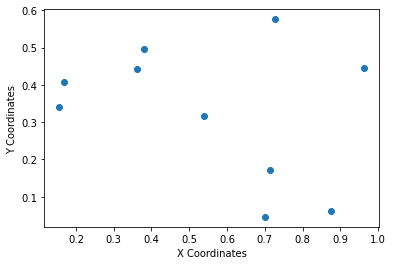

ADJACENCY MATRIX

Source Node is : 1

Destination Node is : 3

  0.0    inf    inf   54.0   30.0    inf   99.0    inf    inf    inf  
  inf    0.0    inf   33.0   40.5   69.0    inf    inf    inf    inf  
  inf    inf    0.0   30.0    inf   58.5   33.0    inf    inf    inf  
 54.0   33.0   30.0    0.0   82.5    inf   18.0   33.0    inf   39.0  
 30.0   40.5    inf   82.5    0.0   39.0   27.0   81.0   30.0   25.5  
  inf   69.0   58.5    inf   39.0    0.0   39.0   54.0   84.0   82.5  
 99.0    inf   33.0   18.0   27.0   39.0    0.0    inf   18.0   27.0  
  inf    inf    inf   33.0   81.0   54.0    inf    0.0    inf    inf  
  inf    inf    inf    inf   30.0   84.0   18.0    inf    0.0    inf  
  inf    inf    inf   39.0   25.5   82.5   27.0    inf    inf    0.0  


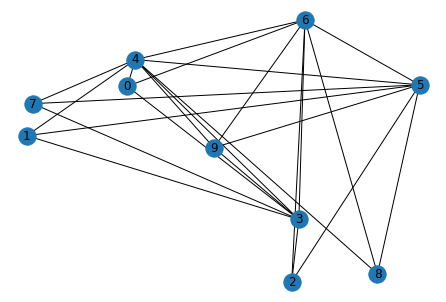



Welcome to Bellman Ford Algorithm

Nodes       :    Weigths    :     Paths
1   -   0   :   70.5         4 0 
1   -   1   :   0         
1   -   2   :   63.0         3 2 
1   -   3   :   33.0         3 
1   -   4   :   40.5         4 
1   -   5   :   69.0         5 
1   -   6   :   51.0         3 6 
1   -   7   :   66.0         3 7 
1   -   8   :   69.0         3 6 8 
1   -   9   :   66.0         4 9 


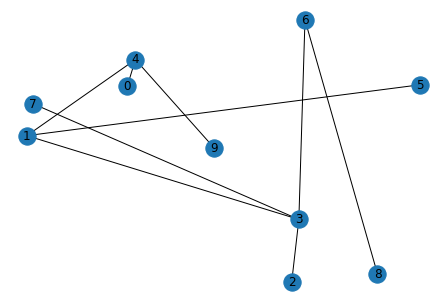

In [12]:
def main_menu():
    print('Graph Displaying System')
    print("1: Prim's Algorithm")
    print("2: Kruskal Algorithm")
    print("3: Dijkstra Algorithm")
    print("4: Bellman Ford Algorithm")
    print("5: Floyd Warshall Algorithm")
    print("6: Clustering Algorithm")
    print("7: Borůvka's Algorithm")
    print('8: Exit ')
    
    option=int(input("Select the Algorithm: "))
    if(option == 8):
        EXIT()
    else:
        input_menu(option)
main_menu()